In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import math

In [46]:
train_data=pd.read_csv("train_loan.csv")
test_data=pd.read_csv("test_loan.csv")

In [47]:
data=pd.concat([train_data,test_data],axis=0)

In [48]:
data.head(50)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [50]:
print(data["Loan_Amount_Term"].isnull().sum())
data[data["Loan_Amount_Term"].isnull()==True]

20


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N
44,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
73,LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
112,LP001391,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N
165,LP001574,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y
197,LP001669,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
223,LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
232,LP001770,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y


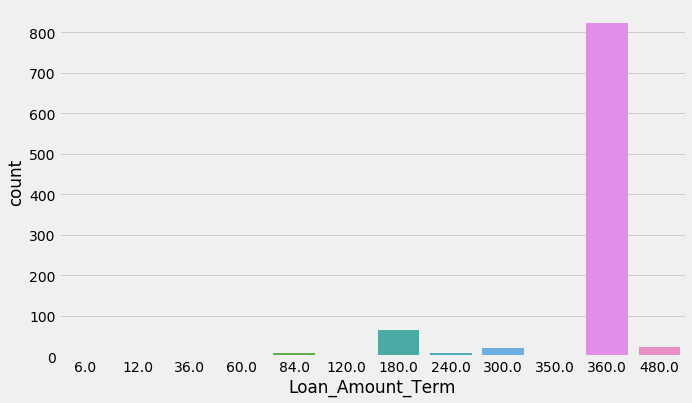

In [51]:
plt.figure(figsize=(10,6))
sns.countplot(data["Loan_Amount_Term"])

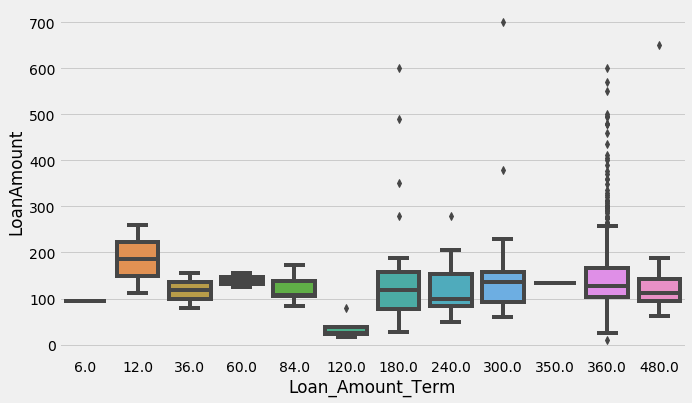

In [52]:
plt.figure(figsize=(10,6))
sns.boxplot(y="LoanAmount",x="Loan_Amount_Term",data=data)

In [53]:
def imputing(cols):
    Loan_Amount_Term=cols[0]
    LoanAmount=cols[1]
    if pd.isnull(Loan_Amount_Term):
        if LoanAmount<=100:
            return 120.0
        elif 200>=LoanAmount>100:
            return 360
        elif (LoanAmount>200):
            return 12.0
    else:
        return Loan_Amount_Term

In [54]:
data['Loan_Amount_Term']=data[['Loan_Amount_Term','LoanAmount']].apply(imputing,axis=1)

In [55]:
print(data["Loan_Amount_Term"].isnull().sum())

0


In [56]:
print(data["Self_Employed"].isnull().sum())
data[data["Self_Employed"].isnull()==True]

55


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,360.0,1.0,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
107,LP001370,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
111,LP001387,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
114,LP001398,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y
158,LP001546,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y


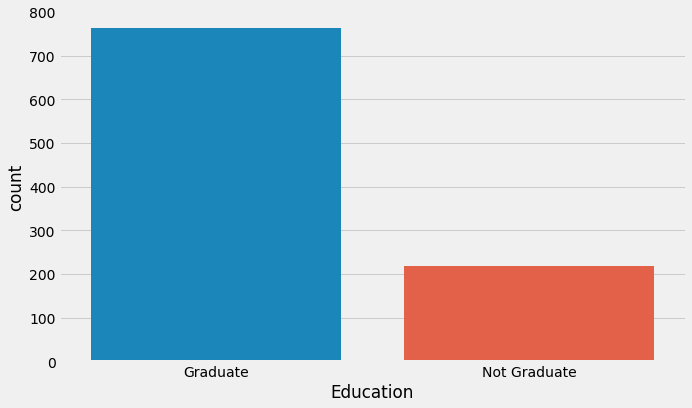

In [57]:
plt.figure(figsize=(10,6))
sns.countplot(data["Education"])

In [58]:
def imputing1(cols):
    Education=cols[0]
    Self_Employed=cols[1]
    if pd.isnull(Self_Employed):
        if Education=="Graduate":
            return "Yes"
        else:
            return "No"
    else:
        return Self_Employed

In [59]:
data["Self_Employed"]=data[["Self_Employed","Education"]].apply(imputing1,axis=1)

In [60]:
print(data["Self_Employed"].isnull().sum())

0


In [61]:
print(data["Credit_History"].isnull().sum())
data[data["Credit_History"].isnull()==True]

79


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,LP001034,Male,No,1,Not Graduate,Not Graduate,3596,0.0,100.0,240.0,NaN,Urban,Y
24,LP001052,Male,Yes,1,Graduate,Graduate,3717,2925.0,151.0,360.0,NaN,Semiurban,N
30,LP001091,Male,Yes,1,Graduate,Graduate,4166,3369.0,201.0,360.0,NaN,Urban,N
42,LP001123,Male,Yes,0,Graduate,Graduate,2400,0.0,75.0,360.0,NaN,Urban,Y
79,LP001264,Male,Yes,3+,Not Graduate,Not Graduate,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,LP002853,Female,No,0,Not Graduate,Not Graduate,3015,2000.0,145.0,360.0,NaN,Urban,NaN
351,LP002901,Male,No,0,Graduate,Graduate,2283,15000.0,106.0,360.0,NaN,Rural,NaN
358,LP002954,Male,Yes,2,Not Graduate,Not Graduate,3132,0.0,76.0,360.0,NaN,Rural,NaN
360,LP002965,Female,Yes,0,Graduate,Graduate,8550,4255.0,96.0,360.0,NaN,Urban,NaN


In [62]:
def imputing2(cols):
    Credit_History=cols[0]
    Loan_Status=cols[1]
    if pd.isnull(Credit_History):
        if Loan_Status=="Y":
            return 1
        else:
            return 0
    else:
        return Credit_History

In [63]:
data["Credit_History"]=data[["Credit_History","Loan_Status"]].apply(imputing2,axis=1)

In [64]:
print(data["Credit_History"].isnull().sum())

0


In [65]:
print(data["Loan_Status"].isnull().sum())

367


In [66]:
def imputing3(cols):
    Credit_History=cols[0]
    Loan_Status=cols[1]
    if pd.isnull(Loan_Status):
        if Credit_History!=0:
            return "Y"
        else:
            return "N"
    else:
        return Loan_Status

In [67]:
data["Loan_Status"]=data[["Credit_History","Loan_Status"]].apply(imputing3,axis=1)

In [68]:
print(data["Loan_Status"].isnull().sum())

0


In [69]:
print(data["Married"].isnull().sum())
data[data["Married"].isnull()==True]

3


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,Graduate,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,Graduate,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,Graduate,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [70]:
def imputing4(cols):
    CoapplicantIncome=cols[0]
    Married=cols[1]
    if pd.isnull(Married):
        if CoapplicantIncome>0:
            return "Yes"
        else:
            return "No"
    else:
        return Married

In [71]:
data["Married"]=data[["CoapplicantIncome","Married"]].apply(imputing4,axis=1)

In [72]:
data["Dependents"]=data["Dependents"].fillna(1)

In [73]:
data["LoanAmount"]=data["LoanAmount"].fillna(np.mean(data["LoanAmount"]))

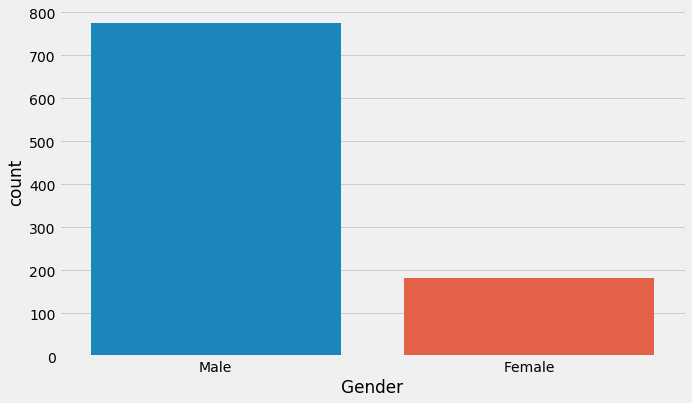

In [74]:
plt.figure(figsize=(10,6))
sns.countplot(data["Gender"])

In [75]:
data["Gender"]=data["Gender"].fillna("Male")
data["Dependents"]=data["Dependents"].replace("3+",3)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             981 non-null    object 
 2   Married            981 non-null    object 
 3   Dependents         981 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      981 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null    float64
 9   Loan_Amount_Term   981 non-null    float64
 10  Credit_History     981 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        981 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 127.3+ KB


In [77]:
data.drop(["Loan_ID"],axis=1,inplace=True)
data["Dependents"].replace("3+",3)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,Graduate,5849,0.0,142.51153,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,Graduate,4583,1508.0,128.00000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Graduate,3000,0.0,66.00000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,Not Graduate,2583,2358.0,120.00000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,Graduate,6000,0.0,141.00000,360.0,1.0,Urban,Y


In [78]:
from sklearn.preprocessing import LabelEncoder

In [79]:
encoder=LabelEncoder()
data["Credit_History"]=encoder.fit_transform(data["Credit_History"])
data["Education"]=encoder.fit_transform(data["Education"])
data["Gender"]=encoder.fit_transform(data["Gender"])
data["Loan_Amount_Term"]=encoder.fit_transform(data["Loan_Amount_Term"])
data["Loan_Status"]=encoder.fit_transform(data["Loan_Status"])
data["Married"]=encoder.fit_transform(data["Married"])
data["Property_Area"]=encoder.fit_transform(data["Property_Area"])
data["Self_Employed"]=encoder.fit_transform(data["Self_Employed"])

In [80]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,142.51153,10,1,2,1
1,1,1,1,0,0,4583,1508.0,128.00000,10,1,0,0
2,1,1,0,0,0,3000,0.0,66.00000,10,1,2,1
3,1,1,0,1,1,2583,2358.0,120.00000,10,1,2,1
4,1,0,0,0,0,6000,0.0,141.00000,10,1,2,1


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [82]:
x=np.array(data.drop(["Loan_Status"],axis=1))
y=np.array(data["Loan_Status"])

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10)
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [84]:
x_train=x_train.reshape(x_train.shape[1],x_train.shape[0])
x_test=x_test.reshape(x_test.shape[1],x_test.shape[0])
y_train=y_train.reshape(1,y_train.shape[0])
y_test=y_test.reshape(1,y_test.shape[0])

In [85]:
class SANN:
    
    def __init__(self,shapes,layers,neurons,activation_function,dl,prob,batch_size):
        self.shapes=shapes
        self.layers=layers
        self.neurons=neurons
        self.activation_function=activation_function
        self.dl=dl
        self.prob=prob
        self.batch_size=batch_size
        self.seedmini=0
        
    def layersizes(self):
        
        self.sizes=[]
        self.sizes.append(self.shapes[0])
        for i in self.neurons:
            self.sizes.append(i)
        self.sizes.append(self.shapes[1])
        
        return self.sizes
    
    def initializing_parameters(self):
        
        layer_dims=self.layersizes()
        self.parameters={}
        l=len(layer_dims)-1
        
        for j in range(1,l):
            self.parameters["W"+str(j)]=np.random.randn(layer_dims[j],layer_dims[j-1])*np.sqrt(2/layer_dims[j-1])
            self.parameters["b"+str(j)]=np.zeros((layer_dims[j],1))
        
        return self.parameters
    
    def initializing_velocity(self,parameters):
        
        v={}
        for i in range(self.layers):
            
            v["dW"+str(i+1)]=np.zeros((parameters["W"+str(i+1)].shape))
            v["db"+str(i+1)]=np.zeros((parameters["b"+str(i+1)].shape))
               
        return v
    
    def initializing_adam(self,parameters):
        
        v={}
        s={}
        
        for i in range(self.layers):
            v["dW"+str(i+1)]=np.zeros((parameters["W"+str(i+1)].shape))
            v["db"+str(i+1)]=np.zeros((parameters["b"+str(i+1)].shape))
            s["dW"+str(i+1)]=np.zeros((parameters["W"+str(i+1)].shape))
            s["db"+str(i+1)]=np.zeros((parameters["b"+str(i+1)].shape))
            
        return v,s
    
    def random_mini_batches(self,x,y,seed):
        
        m=x.shape[1]                 
        mini_batches=[]
        np.random.seed(seed)
        permutation=list(np.random.permutation(m))
        shuffled_x=x[:,permutation]
        shuffled_y=y[:,permutation].reshape((1,m))
        
        total_minibatches=math.floor(m/self.batch_size)
        
        for k in range(0,total_minibatches):
            mini_batch_x=shuffled_x[:,k*self.batch_size:(k+1)*self.batch_size]
            mini_batch_y=shuffled_y[:,k*self.batch_size:(k+1)*self.batch_size]
            mini_batch=(mini_batch_x,mini_batch_y)
            mini_batches.append(mini_batch)
        
        if m%self.batch_size!=0:
            mini_batch_x=shuffled_x[:,self.batch_size*total_minibatches:m]
            mini_batch_y=shuffled_y[:,self.batch_size*total_minibatches:m]
            mini_batch=(mini_batch_x,mini_batch_y)
            mini_batches.append(mini_batch)
         
        return mini_batches
    
    def forward_propagation(self,X,parameters):
        
        cache={"A0":X}
        
        pl=0
        for k in range(1,self.layers+1):
            
            cache["Z"+str(k)]=np.dot(parameters["W"+str(k)],cache["A"+str(k-1)])+parameters["b"+str(k)]
            
            if self.activation_function[k-1]=="tanh":
                cache["A"+str(k)]=np.tanh(cache["Z"+str(k)])
                
            elif self.activation_function[k-1]=="sigmoid":
                cache["A"+str(k)]=1/(1+np.exp(-cache["Z"+str(k)]))
                
            elif self.activation_function[k-1]=="relu":
                cache["A"+str(k)]=np.maximum(0,cache["Z"+str(k)])
            
            if k in self.dl:
                pr=self.prob[pl]
                A=cache["A"+str(k)]
                D=np.random.rand(A.shape[0],A.shape[1])
                D=(D<pr).astype(int)
                cache["D"+str(k)]=D
                A=A*D
                A=A/pr
                pl=pl+1
                cache["A"+str(k)]=A
                
                
        return cache["A"+str(self.layers)],cache
            
            
    def compute_cost(self,Af,Y,parameters,lambd):
        
        m=Y.shape[1]

        cost=-np.sum((np.dot(np.log(Af),Y.T)+np.dot(np.log(1-Af),(1-Y).T)))/m
        
        l=0.0
        for i in range(1,self.layers+1):
            l=l+np.sum(np.square(parameters["W"+str(i)]))
        
        l2=l*(lambd/(2*m))

        cost=float(np.squeeze(cost))+l2

        return cost
    
    def backward_propagation(self,X,Y,cache,parameters,lambd):
        
        m=X.shape[1]
        
        active=self.activation_function[:-1]
        derivatives={}
        grads={}
        
        derivatives["dZ"+str(self.layers)]=np.subtract(cache["A"+str(self.layers)],Y)
        grads["dW"+str(self.layers)]=np.dot(derivatives["dZ"+str(self.layers)],cache["A"+str(self.layers-1)].T)
        grads["db"+str(self.layers)]=(np.sum(derivatives["dZ"+str(self.layers)],axis=1,keepdims=True))/m
        
        for b in range(self.layers-1,0,-1):
            if active[-1]=="tanh":
                derivatives["dA"+str(b)]=np.dot(parameters["W"+str(b+1)].T,derivatives["dZ"+str(b+1)])
                derivatives["dA"+str(b)]=derivatives["dA"+str(b)]*cache["D"+str(b)]
                derivatives["dA"+str(b)]=derivatives["dA"+str(b)]/self.prob[b-1]
                derivatives["dZ"+str(b)]=np.multiply(derivatives["dA"+str(b)],(1-np.power(cache["A"+str(b)],2)))
                grads["dW"+str(b)]=np.dot(derivatives["dZ"+str(b)],cache["A"+str(b-1)].T)/m+(lambd/(2*m))
                active.pop()
            elif active[-1]=="sigmoid":
                dr=1/(1+np.exp(-cache["A"+str(b)]))
                derivatives["dZ"+str(b)]=np.dot(parameters["W"+str(b+1)].T,derivatives["dZ"+str(b+1)])*(dr*(1-dr))
                grads["dW"+str(b)]=np.dot(derivatives["dZ"+str(b)],cache["A"+str(b-1)].T)/m+(lambd/(2*m))
                active.pop()
            elif active[-1]=="relu":
                derivatives["dA"+str(b)]=np.dot(parameters["W"+str(b+1)].T,derivatives["dZ"+str(b+1)])
                derivatives["dA"+str(b)]=derivatives["dA"+str(b)]*cache["D"+str(b)]
                derivatives["dA"+str(b)]=derivatives["dA"+str(b)]/self.prob[b-1]
                derivatives["dZ"+str(b)]=np.multiply(derivatives["dA"+str(b)],np.int64(cache["A"+str(b)]>0))
                grads["dW"+str(b)]=np.dot(derivatives["dZ"+str(b)],cache["A"+str(b-1)].T)/m+(lambd/(2*m))
                active.pop()
                
            grads["db"+str(b)]=(np.sum(derivatives["dZ"+str(b)],axis=1,keepdims=True))/m
        
        return grads
    
    
    def update_parameters(self,parameters,grads,lr):
        
        new_parameters={}
        
        for i in range(1,self.layers+1):
            
            new_parameters["W"+str(i)]=parameters["W"+str(i)]-lr*grads["dW"+str(i)]
            new_parameters["b"+str(i)]=parameters["b"+str(i)]-lr*grads["db"+str(i)]
            
        return new_parameters
    
    def update_parameters_with_momentum(self,parameters,grads,lr,v,beta):
        
        new_parameters={}
        
        for l in range(self.layers):
            
            v["dW" + str(l+1)] = (beta*v["dW" + str(l+1)])+((1-beta)*grads["dW"+str(l+1)])
            v["db" + str(l+1)] = (beta*v["db" + str(l+1)])+((1-beta)*grads["db"+str(l+1)])
            
            new_parameters["W" + str(l+1)] = parameters["W" + str(l+1)]-(lr*v["dW" + str(l+1)])
            new_parameters["b" + str(l+1)] = parameters["b" + str(l+1)]-(lr*v["db" + str(l+1)])
            
        return new_parameters
    
    def update_parameters_with_adam(self,parameters,grads,lr,v,s,beta1,beta2,epsilon,t):
        
        v_corrected={}
        s_corrected={}
        new_parameters={}
        
        for l in range(self.layers):
            
            v["dW" + str(l+1)] = (beta1*v["dW" + str(l+1)])+((1-beta1)*grads["dW"+str(l+1)])
            v["db" + str(l+1)] = (beta1*v["db" + str(l+1)])+((1-beta1)*grads["db"+str(l+1)])
        
            v_corrected["dW" + str(l+1)] = v["dW" + str(l+1)]/(1-(beta1**t))
            v_corrected["db" + str(l+1)] = v["db" + str(l+1)]/(1-(beta1**t))
            
            s["dW" + str(l+1)] = (beta2*s["dW" + str(l+1)])+((1-beta2)*(grads["dW"+str(l+1)])**2)
            s["db" + str(l+1)] = (beta2*s["db" + str(l+1)])+((1-beta2)*(grads["db"+str(l+1)])**2)
            
            s_corrected["dW" + str(l+1)] = s["dW" + str(l+1)]/(1-(beta2**t))
            s_corrected["db" + str(l+1)] = s["db" + str(l+1)]/(1-(beta2**t))
            
            new_parameters["W" + str(l+1)] = parameters["W" + str(l+1)]-(lr*(v_corrected["dW" + str(l+1)]/(np.sqrt(s_corrected["dW" + str(l+1)]))+epsilon))
            new_parameters["b" + str(l+1)] = parameters["b" + str(l+1)]-(lr*(v_corrected["db" + str(l+1)]/(np.sqrt(s_corrected["db" + str(l+1)]))+epsilon))
        
        return new_parameters
     
    def fit(self,training_set,validation_set,epochs,learning_rate,lamda_vl,optimizer,verbose=False):
        
        self.X=training_set[0]
        self.Y=training_set[1]
        self.X_test=validation_set[0]
        self.Y_test=validation_set[1]
        self.cost_error=[]
        self.accuracy_score=[]
        self.weights=self.initializing_parameters()
        
        if optimizer=="gd":
            self.weights=self.initializing_parameters()
        elif optimizer=="Rmsprop":
            self.v=self.initializing_velocity(self.weights)
        elif optimizer=="adam":
            tv=0
            self.v,self.s=self.initializing_adam(self.weights)
        
        for j in range(epochs):
            
            self.seedmini=self.seedmini+1
            mini_batches=self.random_mini_batches(self.X,self.Y,self.seedmini)
            
            for mini_batch in mini_batches:
                
                (minibatch_X,minibatch_Y)=mini_batch
            
                Afinal,cache=self.forward_propagation(minibatch_X,self.weights)

                cost=self.compute_cost(Afinal,minibatch_Y,self.weights,lamda_vl)

                self.grads=self.backward_propagation(minibatch_X,minibatch_Y,cache,self.weights,lamda_vl)
                
                if optimizer=="gd":
                    self.weights=self.update_parameters(self.weights,self.grads,learning_rate)
                elif optimizer=="Rmsprop":
                    self.weights=self.update_parameters_with_momentum(self.weights,self.grads,learning_rate,
                                                                  self.v,beta=0.9)
                
                elif optimizer=="adam":
                    tv=tv+1
                    self.weights=self.update_parameters_with_adam(self.weights,self.grads,learning_rate,
                                                                  self.v,self.s,beta1=0.9,beta2=0.999,
                                                                 epsilon=1e-8,t=tv)
            
            s=1000
            if (j%s==0):
                y_pred=self.predictions(self.X_test)
                acc=accuracy_score(self.Y_test[0],y_pred)*100
                self.cost_error.append(cost)
                self.accuracy_score.append(acc)
                print(f"cost at {j} iteration is ====> {cost} and accuracy score is {acc}")
    
        return self.cost_error,self.accuracy_score
    
    def predictions(self,X):
            Afinal,cache=self.forward_propagation(X,self.weights)
            predictions = []
            for i in range(len(Afinal[0])):
                if (Afinal[0][i]>0.5).any():
                    predictions.append(1)
                else:
                    predictions.append(0)
            predictions=np.array(predictions)
            return predictions
                    

In [95]:
shapes=[x_train.shape[0],y_train.shape[0]]
sample=SANN(shapes,4,[96,64,32,1],
            ["tanh","relu","tanh","sigmoid"],
            [1,2,3],[0.8,0.9,1],32)
loss,accuracy=sample.fit(training_set=[x_train,y_train],
             validation_set=[x_test,y_test],
             epochs=25000,learning_rate=0.005,lamda_vl=0,
            optimizer="Rmsprop")

cost at 0 iteration is ====> 0.6821741490210786 and accuracy score is 69.10569105691057
cost at 1000 iteration is ====> 0.3742096897081032 and accuracy score is 59.34959349593496
cost at 2000 iteration is ====> 0.030716673212728314 and accuracy score is 63.41463414634146
cost at 3000 iteration is ====> 0.05878202013174952 and accuracy score is 61.78861788617886
cost at 4000 iteration is ====> 0.09915476396424378 and accuracy score is 58.536585365853654
cost at 5000 iteration is ====> 0.08343081665318185 and accuracy score is 62.19512195121951
cost at 6000 iteration is ====> 0.007359365423915814 and accuracy score is 59.756097560975604
cost at 7000 iteration is ====> 0.0006414926293513789 and accuracy score is 58.13008130081301
cost at 8000 iteration is ====> 0.018514879136469403 and accuracy score is 60.56910569105691
cost at 9000 iteration is ====> 0.012432259997498172 and accuracy score is 62.601626016260155
cost at 10000 iteration is ====> 0.052573626499794794 and accuracy score is 

In [97]:
plt.ion()
%matplotlib qt
for i in range(1,len(loss)):
    x=range(0,i)
    y=loss[0:i]
    plt.plot(x,y)
    plt.ylabel("cost function error")
    plt.xlabel("cost function for every 1000 iterations")
    plt.title(str(i))
    plt.draw()
    plt.pause(0.1)
plt.show(block=True)

In [98]:
plt.ion()
%matplotlib qt
for i in range(1,len(accuracy)):
    x=range(0,i)
    y=accuracy[0:i]
    plt.plot(x,y)
    plt.ylabel("training accuracy")
    plt.xlabel("training accuracy 1000 iterations")
    plt.title(str(i))
    plt.draw()
    plt.pause(0.1)
plt.show(block=True)

In [99]:
y_pred=sample.predictions(x_test)
print(confusion_matrix(y_test[0],y_pred))
print(classification_report(y_test[0],y_pred))
print(accuracy_score(y_test[0],y_pred))

[[ 13  60]
 [ 37 136]]
              precision    recall  f1-score   support

           0       0.26      0.18      0.21        73
           1       0.69      0.79      0.74       173

    accuracy                           0.61       246
   macro avg       0.48      0.48      0.47       246
weighted avg       0.57      0.61      0.58       246

0.6056910569105691


In [100]:
y_pred=sample.predictions(x_train)
print(confusion_matrix(y_train[0],y_pred))
print(classification_report(y_train[0],y_pred))
print(accuracy_score(y_train[0],y_pred))

[[204   3]
 [  4 524]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       207
           1       0.99      0.99      0.99       528

    accuracy                           0.99       735
   macro avg       0.99      0.99      0.99       735
weighted avg       0.99      0.99      0.99       735

0.9904761904761905
